In [19]:
# Question 1 Local Machine
import torch

if torch.cuda.is_available():
    print("GPU is available.")
    print("GPU device name:", torch.cuda.get_device_name(0))
    print("Number of GPUs:", torch.cuda.device_count())
else:
    print("GPU is not available; using CPU.")

GPU is not available; using CPU.


# Question 1 result from google collab

```
import torch

if torch.cuda.is_available():
    print("GPU is available.")
    print("GPU device name:", torch.cuda.get_device_name(0))
    print("Number of GPUs:", torch.cuda.device_count())
else:
    print("GPU is not available; using CPU.")
    
```

GPU is available.
GPU device name: NVIDIA A100-SXM4-80GB
Number of GPUs: 1

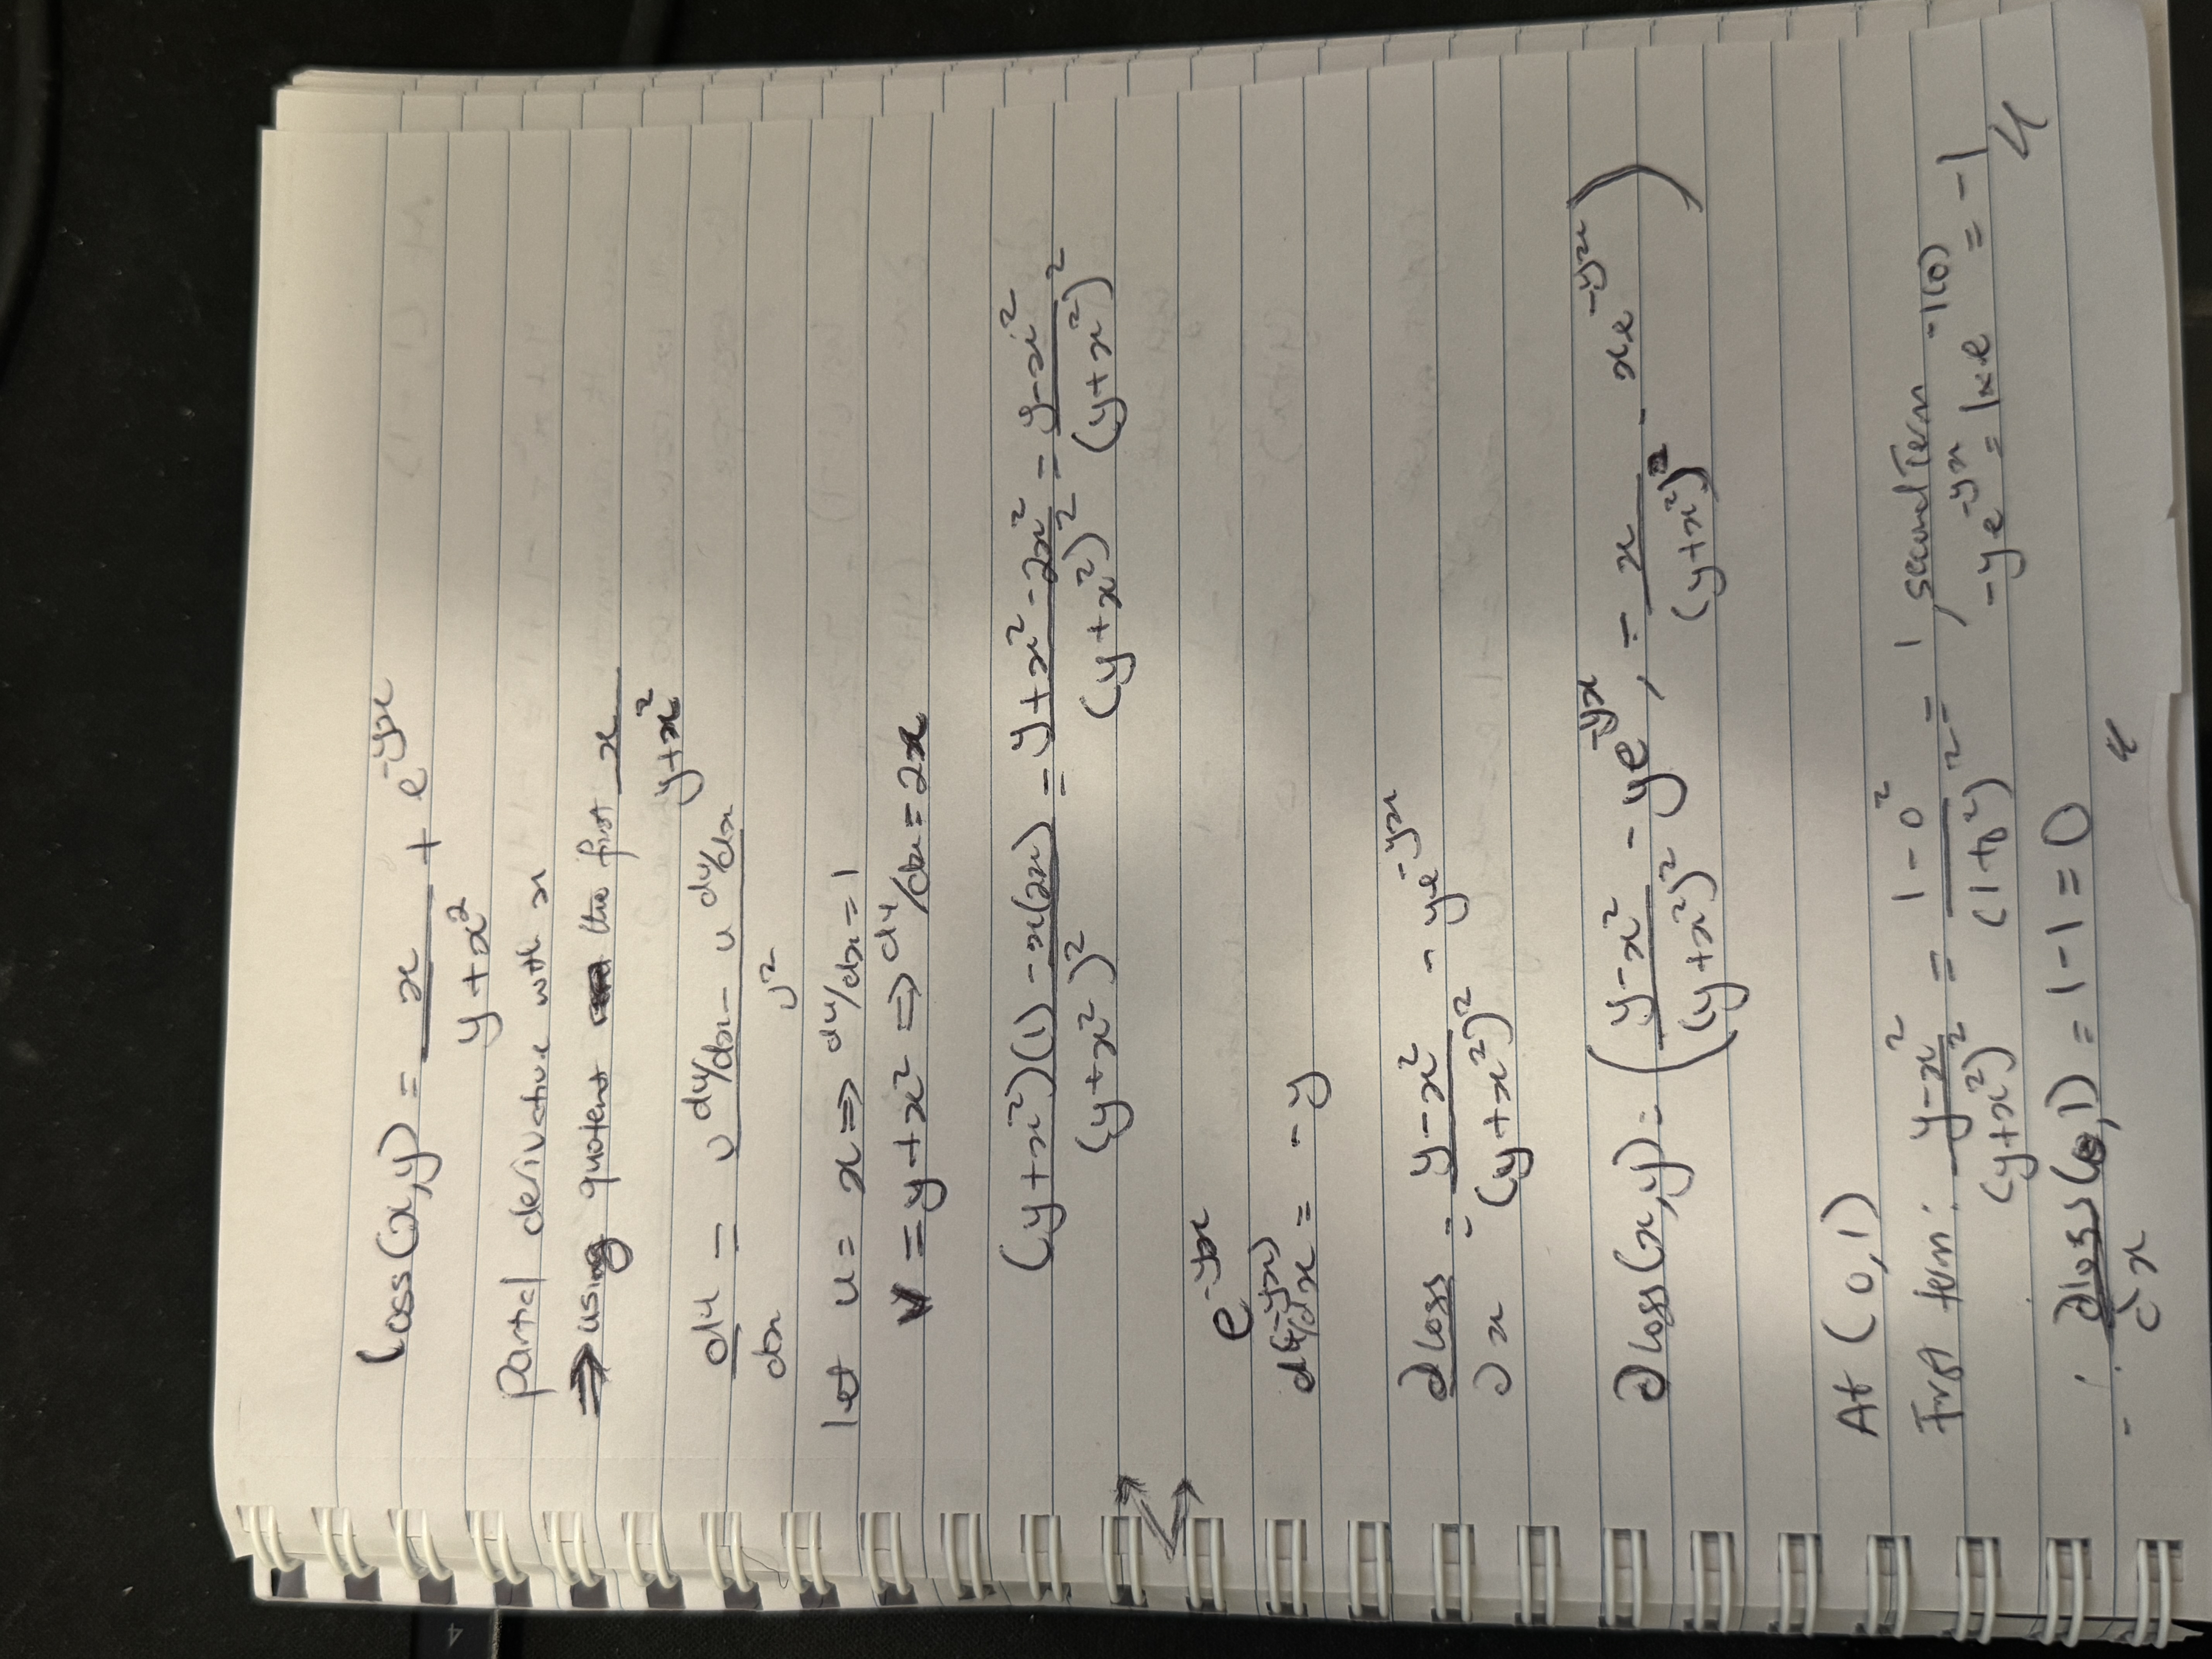 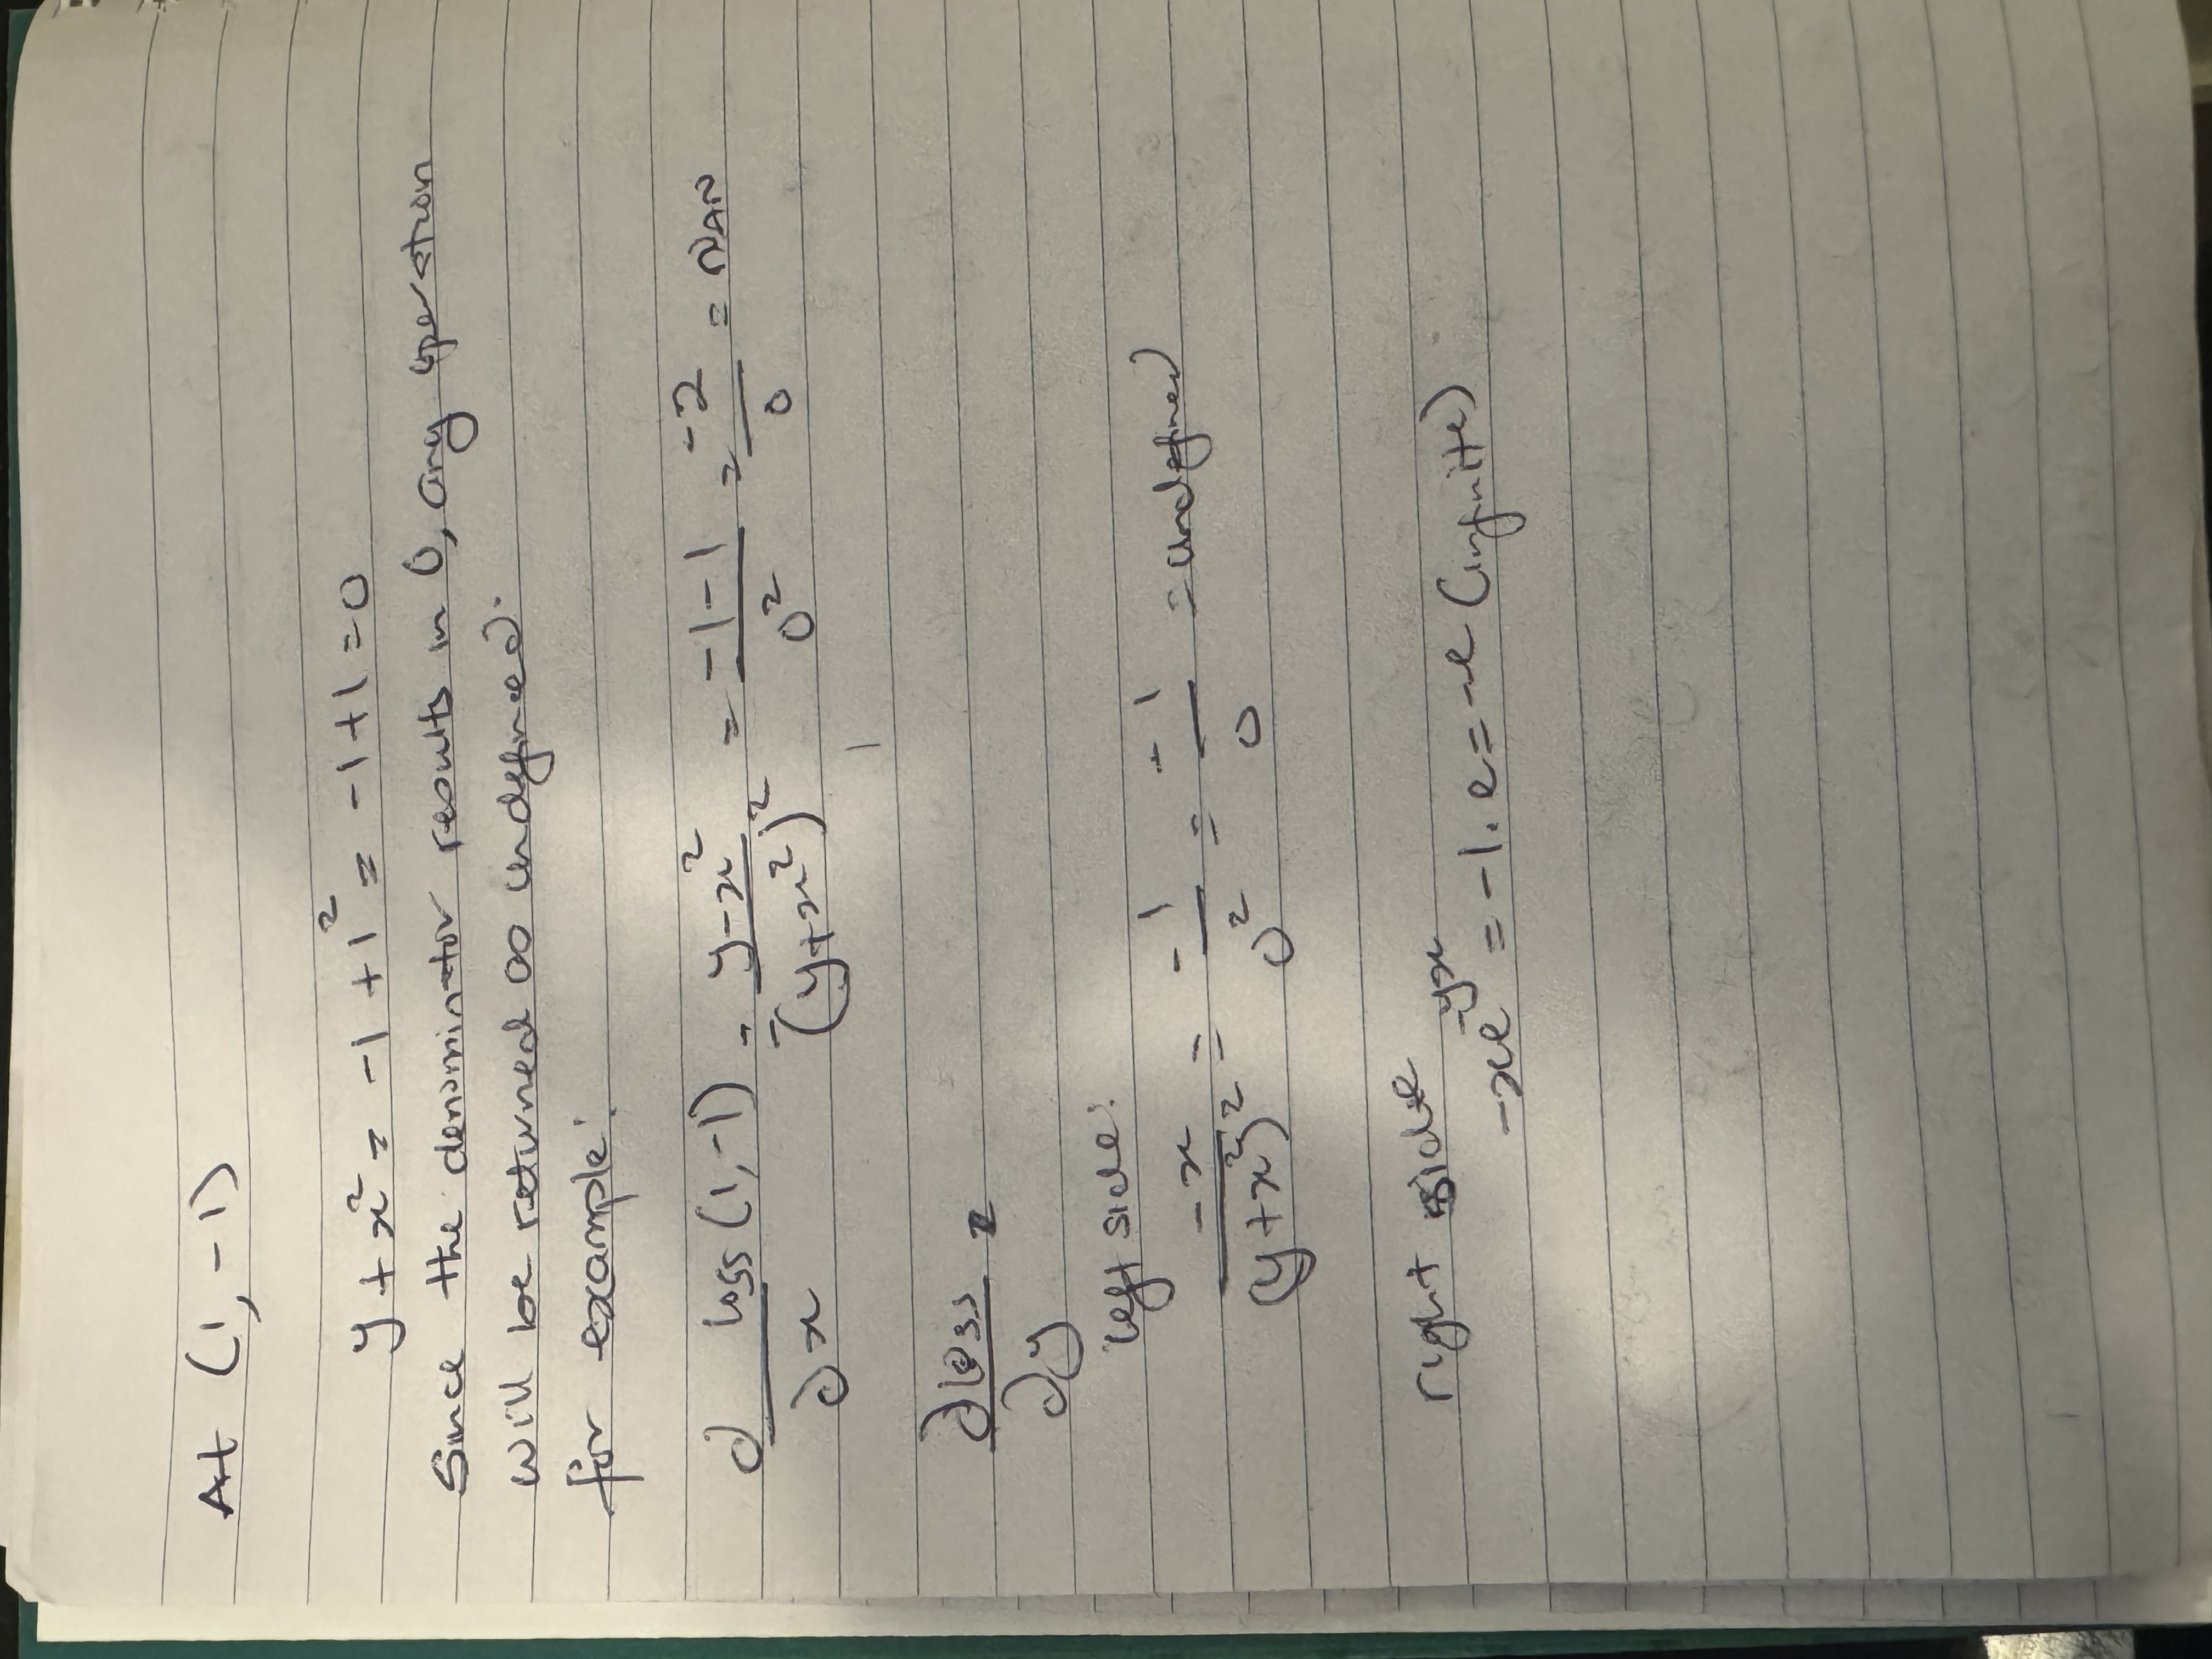

In [51]:
# Question 2, Use Calculus and PyTorch to Derive the Gradient Descent


import torch
import math
import sympy as sp


def loss(x, y):
    try:
        return x / (y + x**2) + torch.exp(-y * x)
    except (ZeroDivisionError, RuntimeError):
        return torch.tensor(float('inf'))

def dloss_dx(x, y):
    try:
        return (y + x**2 - 2*x**2) / (y + x**2)**2 - y * torch.exp(-y * x)
    except ZeroDivisionError:
        return float('inf')

def dloss_dy(x, y):
    try:
        return -x / (y + x**2)**2 + x * torch.exp(-y * x)
    except ZeroDivisionError:
        return float('inf')

if __name__ == "__main__":

    print("\nUsing PyTorch autograd:")

    x1 = torch.tensor(0.0, requires_grad=True)
    y1 = torch.tensor(1.0, requires_grad=True)

    x2 = torch.tensor(1.0, requires_grad=True)
    y2 = torch.tensor(-1.0, requires_grad=True)

    l1 = loss(x1, y1)
    l2 = loss(x2, y2)
    l1.backward()
    l2.backward()

    print("Grad at (0,1):")
    print("dl/dx =", x1.grad.item())
    print("dl/dy =", y1.grad.item())
    print("\nGrad at (1,-1):")
    print("dl/dx =", x2.grad.item())
    print("dl/dy =", y2.grad.item())


Using PyTorch autograd:
Grad at (0,1):
dl/dx = 0.0
dl/dy = -0.0

Grad at (1,-1):
dl/dx = nan
dl/dy = -inf


Epoch 10/3000: w=2.6761, b=2.6801, Loss: 678.6278
Epoch 20/3000: w=2.3078, b=4.9387, Loss: 557.1894
Epoch 30/3000: w=2.3227, b=7.3752, Loss: 465.7780
Epoch 40/3000: w=2.2548, b=9.7202, Loss: 389.3216
Epoch 50/3000: w=2.2028, b=11.9757, Loss: 321.3073
Epoch 60/3000: w=2.1599, b=14.1165, Loss: 264.1721
Epoch 70/3000: w=2.1076, b=16.1283, Loss: 215.4898
Epoch 80/3000: w=2.0472, b=18.0132, Loss: 175.2204
Epoch 90/3000: w=2.0095, b=19.7648, Loss: 141.2093
Epoch 100/3000: w=1.9732, b=21.3766, Loss: 114.1168
Epoch 110/3000: w=1.9414, b=22.8558, Loss: 92.9367
Epoch 120/3000: w=1.9071, b=24.1936, Loss: 75.4757
Epoch 130/3000: w=1.8682, b=25.4030, Loss: 62.3735
Epoch 140/3000: w=1.8483, b=26.4875, Loss: 52.1964
Epoch 150/3000: w=1.8303, b=27.4528, Loss: 44.2304
Epoch 160/3000: w=1.8108, b=28.2973, Loss: 38.4804
Epoch 170/3000: w=1.7937, b=29.0363, Loss: 34.0342
Epoch 180/3000: w=1.7808, b=29.6838, Loss: 31.0475
Epoch 190/3000: w=1.7609, b=30.2390, Loss: 28.7456
Epoch 200/3000: w=1.7561, b=30.720

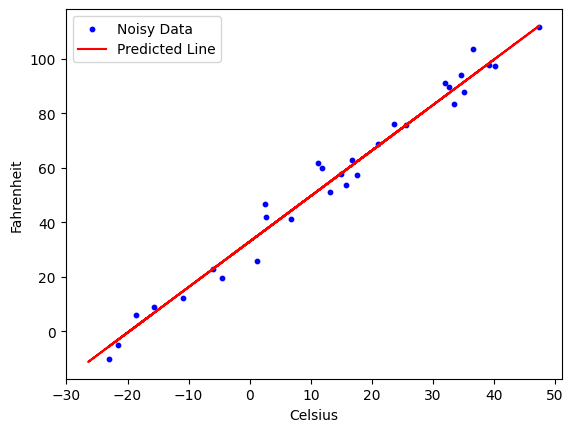

In [ ]:
# Question 3

%matplotlib inline
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
torch.set_printoptions(edgeitems=2, linewidth=75)


t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_f = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_fn = 0.1 * t_f 

add_size = 100 - t_c.size(0)


t_c_added = torch.linspace(-25, 45, steps=add_size)
t_f_added = (9.0 / 5.0) * t_c_added + 32.0

t_c = torch.cat((t_c, t_c_added), 0)
t_f = torch.cat((t_f, t_f_added), 0)

def add_gaussian_noise(t, mean=0.0, std=3.0):
    noise = torch.randn(t.size()) * std + mean
    return t + noise
t_f_noisy = add_gaussian_noise(t_f)
t_c_noisy = add_gaussian_noise(t_c)


t_f_noisy = t_f_noisy.numpy()
t_c_noisy = t_c_noisy.numpy()

t_f_train, t_f_val, t_c_train, t_c_val = train_test_split(
    t_f_noisy, t_c_noisy, test_size=0.7, random_state=42)

# back to tensors after splitting

t_f_train = torch.tensor(t_f_train, dtype=torch.float32)
t_c_train = torch.tensor(t_c_train, dtype=torch.float32)
t_f_val = torch.tensor(t_f_val, dtype=torch.float32)
t_c_val = torch.tensor(t_c_val, dtype=torch.float32)

def model(t_c, w, b): 
    return w * t_c + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


w = torch.tensor(1.0, device='cpu')
b = torch.tensor(0.0, device='cpu')

train_dataset = TensorDataset(t_f_train, t_c_train,)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

val_dataset = TensorDataset(t_f_val, t_c_val)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)


def train_step(w,b, lr=0.1, epochs=3000):
    w.requires_grad_(True)
    b.requires_grad_(True)

    optim = torch.optim.Adam([w, b], lr=lr)
    for epoch in range(epochs):
        total_loss = 0
        for t_f_batch, t_c_batch in train_loader:
            t_f_batch = t_f_batch.to(device='cpu')
            t_c_batch = t_c_batch.to(device='cpu')


            t_p = model(t_c_batch, w, b) # predicted farenhite temperature
            loss = loss_fn(t_p, t_f_batch) # compute the loss for this batch

            optim.zero_grad() 
            loss.backward() # backwards pass to compute gradients
            optim.step() # update weights and bias
            
            total_loss += loss.item() # accumulate loss over batches
        if (epoch + 1) % 10 == 0: 
            mean_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}: w={w.item():.4f}, b={b.item():.4f}, Loss: {mean_loss:.4f}")
    return w, b, mean_loss

w, b, train_loss = train_step(w, b)

# Evaluate on validation set using our discovered parameters w and b, we will not update w and b during this evaluation, we just want to see how well our model performs on the validation set after training.
def evaluate(w, b):
    total_val_loss = 0
    with torch.no_grad():
        for t_f, t_c in val_loader:
            t_f = t_f.to(device='cpu')
            t_c = t_c.to(device='cpu')
            t_p = model(t_c, w, b)
            loss = loss_fn(t_p, t_f)
    return total_val_loss / len(val_loader)

val_loss = evaluate(w, b)
print(f"\nValidation Loss: {val_loss:.4f}")



print(f"\nFinal parameters: w={w.item():.4f}, b={b.item():.4f}, train loss={train_loss:.4f}, val loss={val_loss:.4f}")

import matplotlib.pyplot as plt
t_c_range = t_c_noisy
# predicted farenhite temperature for the range of celsius values, this incluses both train and validation data since we already know what our weight and bias are after training.
t_f_pred = model(torch.tensor(t_c_range, dtype=torch.float32), w, b) 

plt.scatter(t_c_train, t_f_train, label='Noisy Data', color='blue', s=10) # view training data points
plt.plot(t_c_range, t_f_pred.detach().numpy(), label='Predicted Line', color='red') # view the predicted line based on the trained model

plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.legend()
plt.show()

